On a dans cette étude 4 datasets, représentant chacun une classe de notre problème : 
- AIR.csv : Des mesures de l'air sans aucun souffle d'un patient contenant : 10 mesures prises sur 8 variables différentes (donc 80 colonnes) d'une longueur de 4080 echantillons
- CONTROL.csv : Des mesures prises avec le souffle de patients saines : 10 patients x 8 variables (capteurs) x 2 prise = 160 colonnes de 4000 échantillons
- COPD.csv : Des mesures prises avec le souffle de patients atteints de COPD : 20 patients x 8 variables x 2 prises = 320 colonnes de 4000 échantillons
- SMOKERS.csv : Des mesures prises avec le souffle de patients fumeurs : 8 patients x 8 variables x 2 prises = 128 colonnes de 4000 échantillons


In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

On commence 

In [70]:
monFichier = pd.read_csv('./csv_files/SMOKERS.csv', sep=";", header=None)
monFichier

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.361,0.646,0.967,0.815,0.696,0.091,0.331,0.426,0.365,0.651,...,1.399,1.906,1.478,2.367,3.419,2.527,2.348,0.449,1.441,2.024
1,0.361,0.646,0.967,0.815,0.696,0.090,0.331,0.426,0.365,0.651,...,1.399,1.906,1.478,2.367,3.419,2.527,2.348,0.449,1.441,2.024
2,0.361,0.646,0.967,0.815,0.696,0.091,0.331,0.426,0.365,0.651,...,1.399,1.906,1.478,2.367,3.419,2.527,2.348,0.449,1.441,2.024
3,0.361,0.646,0.967,0.815,0.696,0.091,0.331,0.426,0.365,0.651,...,1.399,1.907,1.478,2.367,3.420,2.527,2.348,0.449,1.441,2.024
4,0.361,0.646,0.967,0.815,0.696,0.090,0.331,0.426,0.365,0.651,...,1.399,1.907,1.478,2.367,3.419,2.527,2.348,0.449,1.441,2.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.405,0.679,1.102,0.866,0.736,0.096,0.373,0.474,0.366,0.638,...,1.450,1.943,1.512,2.332,3.317,2.436,2.272,0.428,1.470,2.011
3996,0.405,0.679,1.102,0.866,0.736,0.096,0.373,0.474,0.366,0.638,...,1.450,1.943,1.512,2.332,3.317,2.436,2.272,0.428,1.470,2.011
3997,0.405,0.679,1.102,0.866,0.736,0.096,0.373,0.474,0.366,0.638,...,1.450,1.943,1.512,2.332,3.317,2.436,2.272,0.428,1.470,2.011
3998,0.405,0.679,1.102,0.866,0.736,0.096,0.373,0.474,0.366,0.638,...,1.450,1.943,1.512,2.332,3.317,2.436,2.272,0.428,1.470,2.011


In [71]:
data_capteurs0 = []
for i in range(8) : 
    data = monFichier[i]
    for j in range(8) :
        data += monFichier[i+1+8*(j+1)]
    data_capteurs0.append(list(data))
data_capteurs0 = pd.DataFrame(data_capteurs0)
data_capteurs0 = data_capteurs0.T
data_capteurs0

,0,1,2,3,4,5,6,7
0,5.905,8.871,7.911,6.647,1.458,2.772,3.866,3.912
1,5.905,8.872,7.910,6.647,1.458,2.770,3.865,3.912
2,5.904,8.868,7.909,6.644,1.458,2.771,3.865,3.909
3,5.902,8.867,7.908,6.643,1.458,2.770,3.864,3.910
4,5.904,8.867,7.908,6.644,1.458,2.769,3.864,3.909
...,...,...,...,...,...,...,...,...
3995,6.177,9.782,8.404,7.079,1.568,3.116,4.287,4.325
3996,6.177,9.782,8.404,7.079,1.568,3.116,4.287,4.325
3997,6.177,9.782,8.404,7.079,1.568,3.116,4.287,4.325
3998,6.177,9.782,8.404,7.079,1.568,3.116,4.287,4.325


In [72]:
data_capteurs0 /= 8
data_capteurs0

,0,1,2,3,4,5,6,7
0,0.738125,1.108875,0.988875,0.830875,0.18225,0.346500,0.483250,0.489000
1,0.738125,1.109000,0.988750,0.830875,0.18225,0.346250,0.483125,0.489000
2,0.738000,1.108500,0.988625,0.830500,0.18225,0.346375,0.483125,0.488625
3,0.737750,1.108375,0.988500,0.830375,0.18225,0.346250,0.483000,0.488750
4,0.738000,1.108375,0.988500,0.830500,0.18225,0.346125,0.483000,0.488625
...,...,...,...,...,...,...,...,...
3995,0.772125,1.222750,1.050500,0.884875,0.19600,0.389500,0.535875,0.540625
3996,0.772125,1.222750,1.050500,0.884875,0.19600,0.389500,0.535875,0.540625
3997,0.772125,1.222750,1.050500,0.884875,0.19600,0.389500,0.535875,0.540625
3998,0.772125,1.222750,1.050500,0.884875,0.19600,0.389500,0.535875,0.540625


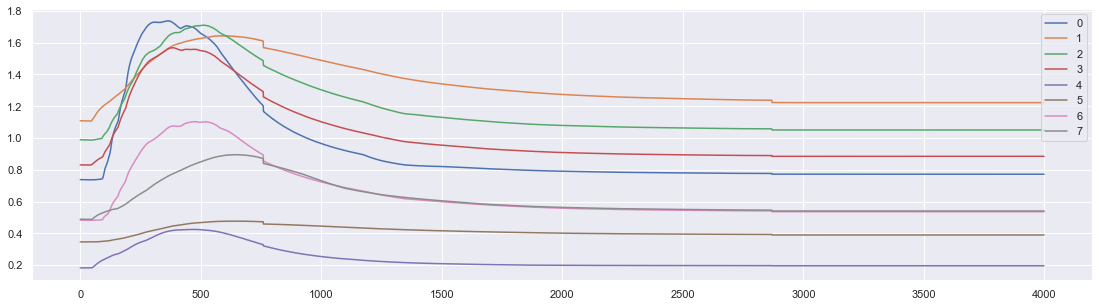

In [73]:
plt.figure(figsize=(19,5))
for i in range(8) :
    data_capteurs0[i].plot(label=i)
plt.legend()

In [62]:
monFichier_COPD = pd.read_csv('./csv_files/COPD.csv', sep=";", header=None)
monFichier_COPD

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,0.477,0.458,0.737,0.426,0.526,0.093,0.276,0.280,0.277,0.351,...,0.186,0.212,0.180,0.239,0.412,0.320,0.367,0.073,0.183,0.219
1,0.477,0.457,0.737,0.425,0.526,0.092,0.276,0.280,0.277,0.351,...,0.186,0.212,0.180,0.239,0.412,0.320,0.367,0.073,0.183,0.219
2,0.477,0.457,0.737,0.426,0.527,0.092,0.276,0.280,0.277,0.351,...,0.186,0.212,0.179,0.239,0.411,0.320,0.367,0.073,0.183,0.219
3,0.477,0.457,0.737,0.426,0.526,0.092,0.276,0.280,0.277,0.351,...,0.186,0.212,0.180,0.239,0.412,0.320,0.366,0.073,0.183,0.219
4,0.477,0.457,0.737,0.426,0.526,0.092,0.276,0.280,0.276,0.351,...,0.186,0.212,0.180,0.239,0.412,0.320,0.366,0.073,0.183,0.219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.405,0.425,0.736,0.425,0.500,0.088,0.277,0.278,0.274,0.347,...,0.194,0.247,0.202,0.263,0.498,0.355,0.402,0.077,0.204,0.239
3996,0.405,0.425,0.736,0.426,0.500,0.088,0.277,0.278,0.274,0.347,...,0.194,0.247,0.202,0.263,0.498,0.355,0.402,0.077,0.204,0.239
3997,0.405,0.425,0.736,0.426,0.500,0.088,0.277,0.278,0.274,0.347,...,0.194,0.247,0.202,0.263,0.498,0.355,0.402,0.077,0.204,0.239
3998,0.405,0.425,0.736,0.426,0.500,0.088,0.277,0.278,0.274,0.347,...,0.194,0.247,0.202,0.263,0.498,0.355,0.402,0.077,0.204,0.239


In [66]:
data_capteurs2 = []
for i in range(40) : 
    data = monFichier_COPD[i]
    for j in range(8) :
        data += monFichier_COPD[i+1+8*(j+1)]
    data_capteurs2.append(list(data))
data_capteurs2 = pd.DataFrame(data_capteurs2)
data_capteurs2 = data_capteurs2.T
data_capteurs2

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19.281,18.796,18.572,8.745,8.071,10.783,9.909,9.884,15.390,15.973,...,5.543,3.282,4.522,7.545,6.067,6.788,1.499,3.292,4.031,3.186
1,19.287,18.793,18.569,8.744,8.069,10.782,9.907,9.897,15.396,15.972,...,5.541,3.280,4.528,7.545,6.067,6.786,1.502,3.291,4.032,3.182
2,19.277,18.795,18.572,8.747,8.066,10.774,9.904,9.886,15.387,15.971,...,5.540,3.280,4.522,7.543,6.067,6.786,1.502,3.288,4.029,3.184
3,19.279,18.795,18.573,8.745,8.066,10.776,9.908,9.889,15.389,15.971,...,5.540,3.280,4.522,7.543,6.067,6.786,1.502,3.287,4.030,3.184
4,19.271,18.793,18.569,8.747,8.071,10.774,9.904,9.884,15.381,15.969,...,5.537,3.278,4.520,7.541,6.067,6.784,1.500,3.290,4.027,3.182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,21.512,20.640,19.446,9.181,8.633,11.240,10.510,10.261,17.075,17.515,...,5.628,3.468,4.610,8.439,6.364,6.903,1.541,3.534,4.070,3.375
3996,21.512,20.640,19.446,9.182,8.633,11.240,10.510,10.261,17.075,17.515,...,5.628,3.468,4.610,8.439,6.364,6.903,1.541,3.534,4.070,3.375
3997,21.512,20.640,19.446,9.182,8.633,11.240,10.510,10.261,17.075,17.515,...,5.628,3.468,4.610,8.439,6.364,6.903,1.541,3.534,4.070,3.375
3998,21.514,20.640,19.443,9.180,8.633,11.240,10.506,10.263,17.077,17.515,...,5.627,3.466,4.610,8.440,6.364,6.903,1.540,3.534,4.070,3.373


In [68]:
data_capteurs2 /= 40

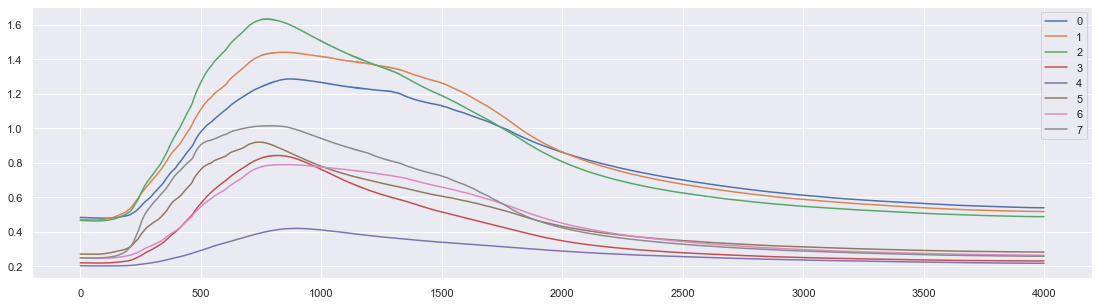

In [69]:
plt.figure(figsize=(19,5))
for i in range(8) :
    data_capteurs2[i].plot(label=i)
plt.legend()

In [74]:
monFichier_CONTROL = pd.read_csv('./csv_files/CONTROL.csv', sep=";", header=None)
monFichier_CONTROL

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,0.224,0.259,0.354,0.516,0.559,0.058,0.140,0.277,0.184,0.269,...,0.212,0.386,0.239,0.429,0.725,0.771,0.777,0.085,0.284,0.526
1,0.224,0.259,0.354,0.516,0.559,0.058,0.140,0.277,0.184,0.269,...,0.212,0.386,0.239,0.429,0.725,0.771,0.777,0.085,0.284,0.526
2,0.224,0.259,0.354,0.516,0.559,0.058,0.140,0.277,0.184,0.269,...,0.212,0.386,0.238,0.430,0.725,0.771,0.778,0.086,0.284,0.526
3,0.224,0.259,0.354,0.516,0.559,0.058,0.139,0.277,0.184,0.269,...,0.212,0.386,0.238,0.430,0.725,0.772,0.778,0.085,0.284,0.526
4,0.224,0.259,0.354,0.516,0.559,0.058,0.140,0.277,0.184,0.269,...,0.212,0.386,0.238,0.430,0.725,0.772,0.778,0.085,0.284,0.527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.202,0.270,0.518,0.495,0.496,0.053,0.197,0.295,0.234,0.312,...,0.397,0.756,0.373,0.530,1.183,1.134,1.100,0.102,0.417,0.752
3996,0.202,0.270,0.518,0.495,0.496,0.053,0.197,0.295,0.234,0.312,...,0.397,0.756,0.373,0.530,1.183,1.134,1.100,0.102,0.417,0.752
3997,0.202,0.270,0.518,0.495,0.496,0.053,0.197,0.295,0.234,0.312,...,0.396,0.756,0.373,0.530,1.183,1.134,1.099,0.102,0.417,0.752
3998,0.202,0.270,0.518,0.495,0.495,0.054,0.197,0.295,0.234,0.312,...,0.396,0.755,0.373,0.529,1.182,1.134,1.099,0.102,0.417,0.752


In [80]:
data_capteurs5 = []
for i in range(20) : 
    data = monFichier_CONTROL[i]
    for j in range(8) :
        data += monFichier_CONTROL[i+1+8*(j+1)]
    data_capteurs5.append(list(data))
data_capteurs5 = pd.DataFrame(data_capteurs5)
data_capteurs5 = data_capteurs5.T
data_capteurs5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.090,4.207,5.039,5.296,1.074,1.765,2.357,2.255,3.118,4.263,5.176,5.253,1.012,1.782,2.432,2.262,3.130,4.260,5.201,5.202
1,3.090,4.207,5.041,5.298,1.074,1.764,2.358,2.254,3.117,4.262,5.176,5.255,1.012,1.781,2.432,2.261,3.128,4.259,5.201,5.202
2,3.090,4.207,5.040,5.296,1.074,1.766,2.357,2.254,3.116,4.261,5.174,5.252,1.012,1.783,2.431,2.260,3.127,4.258,5.199,5.199
3,3.090,4.206,5.039,5.296,1.074,1.766,2.356,2.254,3.117,4.260,5.174,5.251,1.012,1.783,2.430,2.261,3.128,4.257,5.199,5.200
4,3.090,4.205,5.040,5.296,1.074,1.765,2.365,2.256,3.118,4.261,5.176,5.254,1.012,1.782,2.439,2.262,3.129,4.259,5.200,5.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3.727,6.730,7.285,6.858,1.070,2.567,2.711,2.973,3.815,6.778,7.502,6.946,1.137,2.589,2.852,3.105,3.917,6.979,7.704,7.085
3996,3.726,6.729,7.285,6.858,1.068,2.567,2.709,2.972,3.815,6.777,7.502,6.946,1.135,2.589,2.850,3.104,3.918,6.977,7.704,7.084
3997,3.726,6.726,7.282,6.856,1.068,2.567,2.709,2.972,3.814,6.775,7.499,6.943,1.135,2.589,2.850,3.104,3.916,6.977,7.701,7.082
3998,3.725,6.725,7.280,6.854,1.067,2.568,2.708,2.972,3.813,6.774,7.497,6.941,1.135,2.589,2.850,3.103,3.916,6.974,7.699,7.080


In [81]:
data_capteurs5 /= 20

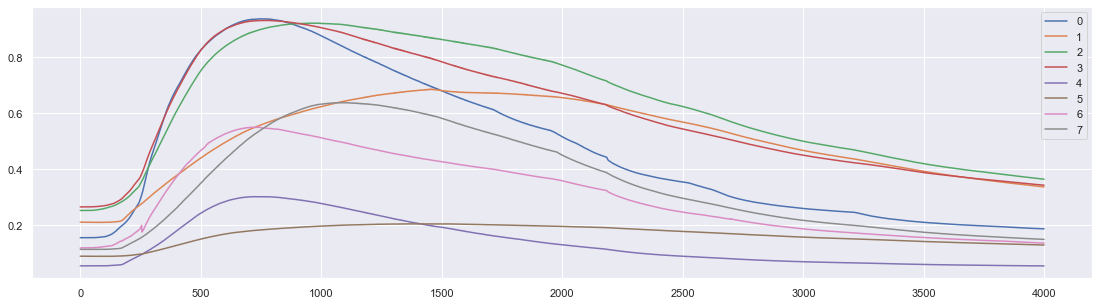

In [82]:
plt.figure(figsize=(19,5))
for i in range(8) :
    data_capteurs5[i].plot(label=i)
plt.legend()

Text(0.5, 1.0, 'Control')

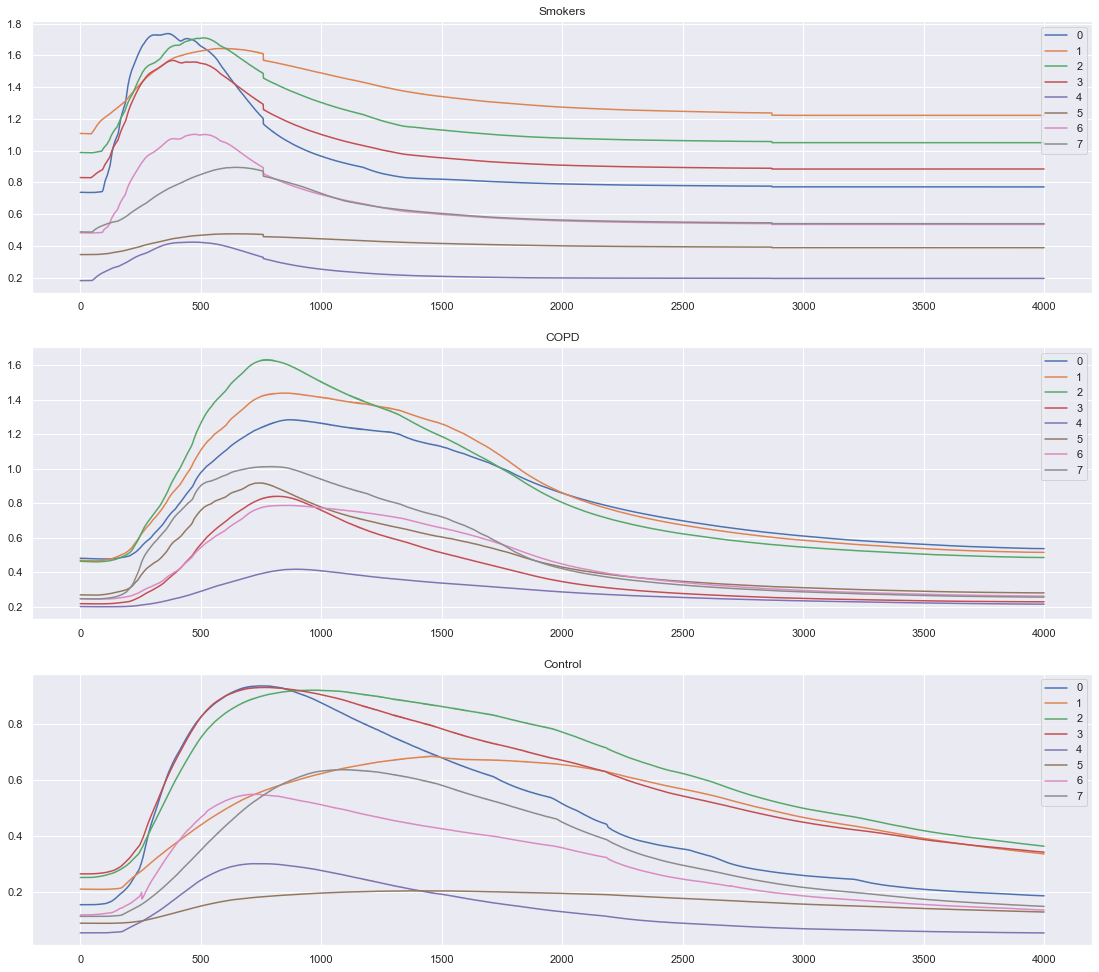

In [83]:
plt.figure(figsize=(19,17))
plt.subplot(3,1,1)
for i in range(8) :
    data_capteurs0[i].plot(label=i)
plt.legend()
plt.title("Smokers")
plt.subplot(3,1,2)
for i in range(8) :
    data_capteurs2[i].plot(label=i)
plt.legend()
plt.title("COPD")
plt.subplot(3,1,3)
for i in range(8) :
    data_capteurs5[i].plot(label=i)
plt.legend()
plt.title("Control")

In [87]:
monFichier_SOMME = pd.read_csv('./test_sommes.csv', sep=";", header=None)
monFichier_SOMME

,0,1,2,3,4,5,6,7
0,0.354125,0.633125,0.939875,0.828625,0.704250,0.091000,0.314750,0.427500
1,0.354125,0.633125,0.940000,0.828500,0.704250,0.090875,0.314625,0.427375
2,0.353875,0.633000,0.939500,0.828375,0.704000,0.091000,0.314625,0.427375
3,0.354000,0.632750,0.939375,0.828250,0.703750,0.091000,0.314500,0.427250
4,0.354000,0.633000,0.939375,0.828250,0.703875,0.090875,0.314500,0.427250
...,...,...,...,...,...,...,...,...
3995,0.388875,0.656875,1.034250,0.867750,0.740500,0.096000,0.345125,0.466375
3996,0.388875,0.656875,1.034250,0.867750,0.740500,0.096000,0.345125,0.466375
3997,0.388875,0.656875,1.034250,0.867750,0.740500,0.096000,0.345125,0.466375
3998,0.388875,0.656875,1.034250,0.867750,0.740500,0.096000,0.345125,0.466375


Text(0.5, 1.0, 'Smokers')

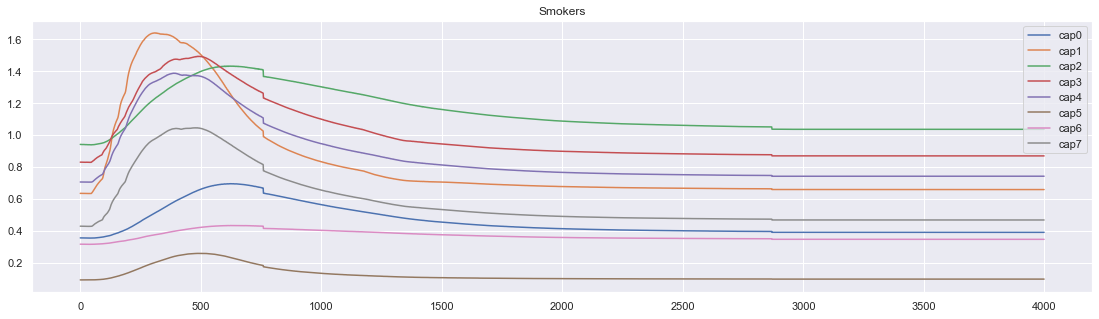

In [92]:
plt.figure(figsize=(19,5))
for i in range(8) :
    monFichier_SOMME[i].plot(label=f'cap{i}')
plt.legend()
plt.title("Smokers")